# Install Libraries

- Install Pandas
- Install matplotlib
- Install seaborn

# Farmer Data Insights

**Task 1**: [Introduction](#Introduction)

**Task 2**: [Exploratory Data Analysis and Preprocessing](#Exploratory-Data-Analysis-and-Preprocessing)

**Task 3**: [Farmer's Question 1](#Farmer's-Question-1)

**Task 4**: [Farmer's Question 2](#Farmer's-Question-2)

**Task 5**: [Suggestion-to-Farmer](#Suggestion-to-Farmer)

# Introduction

We received the following data set from a farmer. They have planted multiple varieties in their field to determine if one variety outperforms another. The farmer has heard that some varieties may perform better in good soil (high productivity zones), while others have been bred to perform well in poorer soils (low productivity zones). 

The Farmer also tested 3 different fungicides (treatments) - all claiming to increase yields, but with different mechanisms. So the farmer sprayed strips of either one or a combination of the fungicides in different areas of the field to determine if there was any financial incentive to one (or one combo over another). 

Finally, at Deveron, we convinced the farmer to let us fly their field with a drone to capture NDVI values across their field. We told them we could gain insight on the relative health of their field from this data.

Note: Yield is a typical response variable used to determine relative success of a variable (higher yield is desirable).

Please use the test.csv data to address the farmers questions. Summarize your insights in a Python based Jupyter notebook and feel free to include any follow up questions you may have.

# Exploratory Data Analysis and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
config = {}
config['agro_data_path'] = 'test.csv'

In [3]:
agro_data = pd.read_csv(config['agro_data_path'])
agro_data.head(10)

,Yield,Treatment,Productivity Zone,Area,Variety,NDVI
0,52.5155,Cotegra and Acapella,Low,0.003553,B088Y1,0.9058
1,54.4489,Cotegra and Acapella,Low,0.003464,B088Y1,0.9058
2,51.1207,Cotegra and Acapella,Low,0.003456,B088Y1,0.9058
3,51.6806,Cotegra and Acapella,Low,0.003397,B088Y1,0.9083
4,45.9235,Cotegra and Acapella,Low,0.003456,B088Y1,0.9083
5,50.4746,Cotegra and Acapella,Low,0.003487,B088Y1,0.9082
6,52.2105,Cotegra and Acapella,Low,0.003428,B088Y1,0.9082
7,53.2683,Cotegra and Acapella,Low,0.003417,B088Y1,0.8964
8,54.9809,Cotegra and Acapella,Low,0.003419,B088Y1,0.8964
9,56.7777,Cotegra and Acapella,Low,0.003502,B088Y1,0.8964


## Examining the missing values

In [4]:
agro_data.isnull().sum()

Yield                0
Treatment            0
Productivity Zone    0
Area                 0
Variety              0
NDVI                 0
dtype: int64

In [5]:
# Print the percentage of the rows whose feature is missing.
columns = agro_data.columns.to_list()
for col in columns:
    percent_missing = agro_data[col].isnull().sum() * 100 / len(agro_data[col])
    print("percent of missing values in",  col +"is",percent_missing)

percent of missing values in Yieldis 0.0
percent of missing values in Treatmentis 0.0
percent of missing values in Productivity Zoneis 0.0
percent of missing values in Areais 0.0
percent of missing values in Varietyis 0.0
percent of missing values in NDVIis 0.0


**This Data doesn't contain any null values.**

## Exploring Categorical Values

### Treatment(Fungicides)

In [6]:
agro_data['Treatment'].value_counts()

Cotegra and Acapella    13306
Cotegra and Priaxor      4306
Priaxor                  1245
Acapella                 1078
None                      839
Cotegra                   405
Name: Treatment, dtype: int64

**Farmer is using 3 different types of treatments(fungicides)**
1. Priaxor
2. Acapella
3. Cotegra

**And, farmer is also using two combinations of these treatments**
1. Cotegra and Acapella
2. Cotegra and Priaxor

**Apart from these treatments, there are some areas where farmer didn't use any kind of treatment.**

### Productivity Zone

In [7]:
agro_data['Productivity Zone'].value_counts()

Med     9266
High    8788
Low     3125
Name: Productivity Zone, dtype: int64

**Productivity Zone is divided into three categories**

1. High
2. Medium
3. Low

### Variety

In [8]:
agro_data['Variety'].value_counts()

B088Y1     16781
Katonda     4398
Name: Variety, dtype: int64

In [9]:
print('Dataset shapes')
print(f'Rows and Columns: {agro_data.shape}')
print(f'Columns are: {agro_data.columns.to_list()}')

Dataset shapes
Rows and Columns: (21179, 6)
Columns are: ['Yield', 'Treatment', 'Productivity Zone', 'Area', 'Variety', 'NDVI']


## Summary Statistics of the continous variables

Summary tells you the detailed statistics such as count(number of rows), mean, standard deviation, minimum, maximum and quantiles(25th, 50th & 7th) of the features.

In [10]:
agro_data.describe()

,Yield,Area,NDVI
count,21179.000000,21179.000000,21179.000000
mean,65.746399,0.003265,0.903644
std,25.909912,0.000649,0.008686
min,0.009500,0.000007,0.845900
25%,59.461850,0.002966,0.898500
50%,64.518700,0.003358,0.904900
75%,69.520450,0.003640,0.910100
max,843.439700,0.010160,0.924600


## Understanding NDVI feature

It can be seen that NDVI values has a limited range(0.84 - 0.92) in the dataset. It shows that the plants are healthy all over the farming area.

Also, when we calculate the correlation of NDVI with the 'Yield' variable, we see that there is a very low correlation.

In [11]:
agro_data['NDVI'].min(), agro_data['NDVI'].max()

(0.8459, 0.9246)

In [12]:
agro_filter_df = agro_data[['Yield','NDVI']]
corr_title = 'Yield, NDVI'
print("===",corr_title,"===")
print("\nPEARSON'S CORRELATION:=\n")
print(agro_filter_df.corr(method='pearson'))
print("\nSPEARMAN'S CORRELATION:=\n")
print(agro_filter_df.corr(method='spearman'))
print("\n")

=== Yield, NDVI ===

PEARSON'S CORRELATION:=

          Yield      NDVI
Yield  1.000000  0.037874
NDVI   0.037874  1.000000

SPEARMAN'S CORRELATION:=

          Yield      NDVI
Yield  1.000000  0.131491
NDVI   0.131491  1.000000




## Correlation Analysis

If we were to predict the Yield quantity using Regression Model then the correlation analysis would be beneficial in deciding the importaant features.

Here, correlation analysis using heatmap shows that 'Area' is most negatively correlated feature with the response variable 'Yield'. However, 'NDVI' doesnot shows any kind of relation with the tearget('Yield').

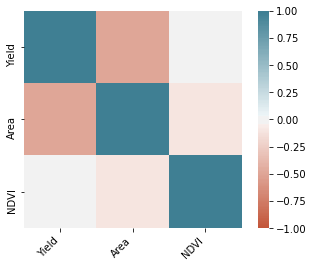

In [13]:
corr = agro_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

# Farmer's Question 1

**Farmers have planted multiple varieties in their field to determine if one variety outperforms another. The farmer has heard that some varieties may perform better in good soil (high productivity zones), while others have been bred to perform well in poorer soils (low productivity zones).**

### Checking the total area for each productivity zone.

Looking at the total area allocated to each productivity zone we can tell that most of the land has medium productivity. The high productivity area is also comparable to medium productive area. However, low productive area is quite small.

In [14]:
agro_data.groupby('Productivity Zone').agg({'Area': ['sum']})

,Area
,sum
Productivity Zone,
High,28.129640
Low,10.541325
Med,30.479925


### Determining which variety performs best

Analyzing variety and productivity parameters with yield per area. Yield per area helps us understand the growth independent of the size distribution of the farmer's land. <br>
We can easily derive following **insights** from the below line/bar graphs:

- "Katonda" variety clearly outperforms "B088Y1" in every productivity zone. 
- "B088Y1" has very less yield per area in low productivity zone.
- "Katonda" has highest yield per area in high productivity zone with similar yield in low and medium zones. 

In [15]:
variety_analysis = agro_data.groupby(['Variety', 'Productivity Zone']).agg({'Yield':['sum'], 'Area':['sum']}) #.sum()
variety_analysis.columns = ['Total Yield', 'Total Area']
variety_analysis = variety_analysis.reset_index()
variety_analysis['Yield Per Area'] = variety_analysis['Total Yield']/variety_analysis['Total Area']
variety_analysis

,Variety,Productivity Zone,Total Yield,Total Area,Yield Per Area
0,B088Y1,High,572195.3853,27.365726,20909.197766
1,B088Y1,Low,81165.0102,5.335279,15212.888705
2,B088Y1,Med,440117.6225,22.497817,19562.680976
3,Katonda,High,18239.8509,0.763914,23876.850602
4,Katonda,Low,110823.5943,5.206046,21287.478067
5,Katonda,Med,169901.5289,7.982108,21285.297010


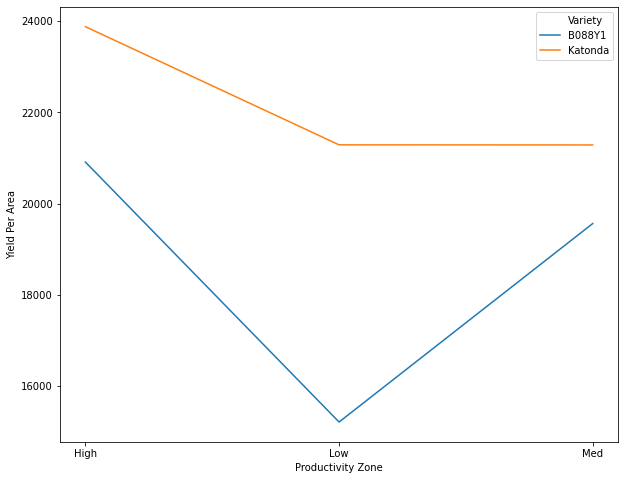

In [16]:
plt.figure(figsize = (10,8))
sns.lineplot(x="Productivity Zone", y="Yield Per Area", hue="Variety", data=variety_analysis)

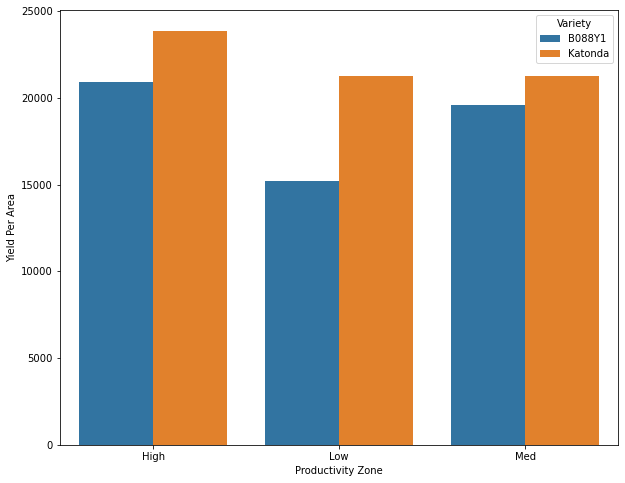

In [17]:
plt.figure(figsize = (10,8))
sns.barplot(x="Productivity Zone", y="Yield Per Area", hue="Variety", data=variety_analysis)

# Farmer's Question 2

**The Farmer also tested 3 different fungicides (treatments) - all claiming to increase yields, but with different mechanisms. So the farmer sprayed strips of either one or a combination of the fungicides in different areas of the field to determine if there was any financial incentive to one (or one combo over another).**

### Determining which fungicide gives best yield

The question about which fungicide to use depends on what variety of crops are to be grown, it also depends on productivity zone in which crops will be grown in. Hence, we need to do a multivariate analysis to find out the answer to farmer's question.

We can easily derive following **insights** from the below line/bar graphs:

- Using variety B088Y1
  - Growing in <b>High</b> productive area, none of the fungicides should be used.
  - Growing in <b>Low or Medium</b> productive areas, Acapella gives the max yield.
- Using variety Katonda
  - Growing in <b>High or Medium</b> productive areas, combination of <b>Cotegra and Priaxor</b> gives the max yield.
  - Growing in <b>Low</b> productive area, combination of <b>Cotegra and Acapella</b> fungicides should be used.

In [18]:
treatment_analysis = agro_data.groupby(['Variety', 'Productivity Zone', 'Treatment']).agg({'Yield':['sum'], 'Area':['sum']}) #.sum()
treatment_analysis.columns = ['Total Yield', 'Total Area']
treatment_analysis = treatment_analysis.reset_index()
treatment_analysis['Yield Per Area'] = treatment_analysis['Total Yield']/treatment_analysis['Total Area']
treatment_analysis

,Variety,Productivity Zone,Treatment,Total Yield,Total Area,Yield Per Area
0,B088Y1,High,Acapella,38626.7316,2.203460,17530.037695
1,B088Y1,High,Cotegra,9846.6013,0.543510,18116.681711
2,B088Y1,High,Cotegra and Acapella,315652.3469,15.577242,20263.686272
3,B088Y1,High,Cotegra and Priaxor,131860.5120,5.939484,22200.666442
4,B088Y1,High,None,31071.2708,1.000032,31070.282765
5,B088Y1,High,Priaxor,45137.9227,2.101998,21473.816058
6,B088Y1,Low,Acapella,1976.5683,0.116825,16919.052429
7,B088Y1,Low,Cotegra and Acapella,68784.4498,4.579405,15020.388848
8,B088Y1,Low,Cotegra and Priaxor,7339.8503,0.440917,16646.795869
9,B088Y1,Low,None,1083.1565,0.075952,14261.066200


<Figure size 2160x2160 with 0 Axes>

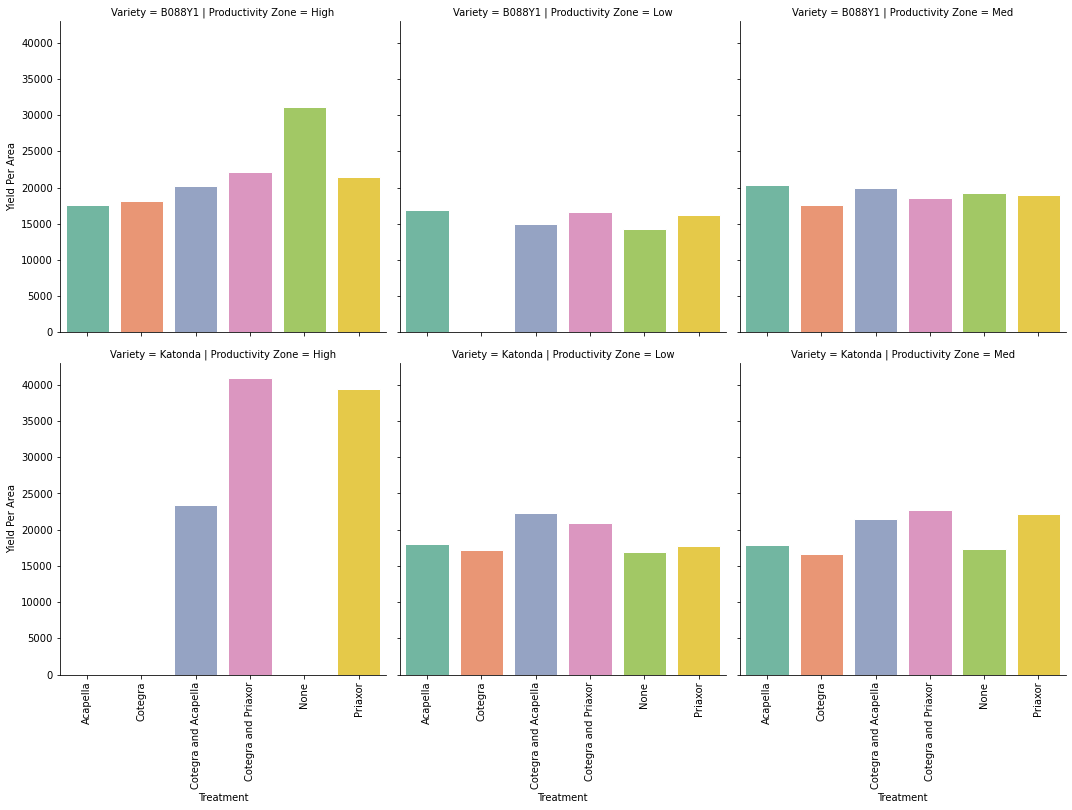

In [19]:
plt.figure(figsize=(30, 30))
g = sns.FacetGrid(treatment_analysis, col="Productivity Zone",  row="Variety", height=5, aspect=1, hue="Treatment", palette="Set2")
g = g.map(sns.barplot, "Treatment", "Yield Per Area", edgecolor="w", order=treatment_analysis['Treatment'].unique())
g.set_xticklabels(rotation=90)
plt.show()

## Suggestion to Farmer

- As discussed above, farmer can maximize the Yield by growing Katonda variety.
- They can also use combination of Cotegra and Priaxor fungicide in High productivity zone to keep Katonda plants healthy for better yield.
- To grow B088Y1 variety in high productivity zone, farmer should not used any fungicide to get best yield.
- In medium and low productivity zones, the yield for all the fungicides and their combinations is very similar. If fungicided are expensive, then farmer can save money by not using them and still have a very similar yield.  